In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('data/gamedev_abtest.csv')
data.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [15]:
data.describe()

,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,6.968400e+05,696840.000000,6.968400e+05,696840.0,696840.0,45412.000000,168193.000000
mean,2.448543e+06,426.099963,1.485821e+05,0.0,0.0,1992.865322,936.481899
std,1.210664e+08,434.405962,1.764010e+07,0.0,0.0,3895.541280,3522.989145
min,-2.128381e+09,-1.000000,0.000000e+00,0.0,0.0,500.000000,100.000000
25%,3.314100e+04,59.000000,3.700000e+01,0.0,0.0,500.000000,500.000000
50%,1.729600e+05,245.000000,5.200000e+01,0.0,0.0,1000.000000,600.000000
75%,5.094630e+05,735.000000,7.300000e+01,0.0,0.0,2400.000000,1000.000000
max,2.139124e+09,1299.000000,2.123448e+09,0.0,0.0,189600.000000,755950.000000


In [11]:
data.groupby('AbGroup')['user_id'].agg(['count', 'nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [16]:
data['AbGroup'].value_counts(normalize=True)

AbGroup
Control    0.800858
Test       0.199142
Name: proportion, dtype: float64

In [18]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format = '%Y-%m-%d')
data['install_date'] = pd.to_datetime(data['install_date'], format = '%Y-%m-%d')

In [19]:
data.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


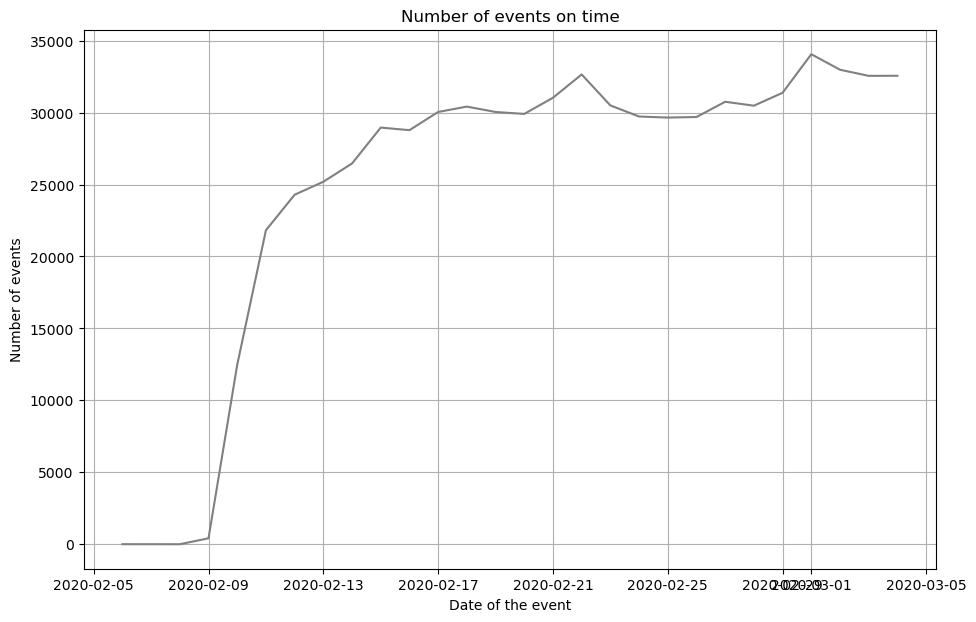

In [29]:
plt.figure(figsize=(11, 7))
plt.plot(data.groupby('time_stamp')['user_id'].count(), color='gray')
plt.xlabel('Date of the event')
plt.ylabel('Number of events')
plt.title('Number of events on time')
plt.grid(True)
plt.show()

The testing took 1 month

In [32]:
data.groupby('time_stamp')['user_id'].agg(['count', 'nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


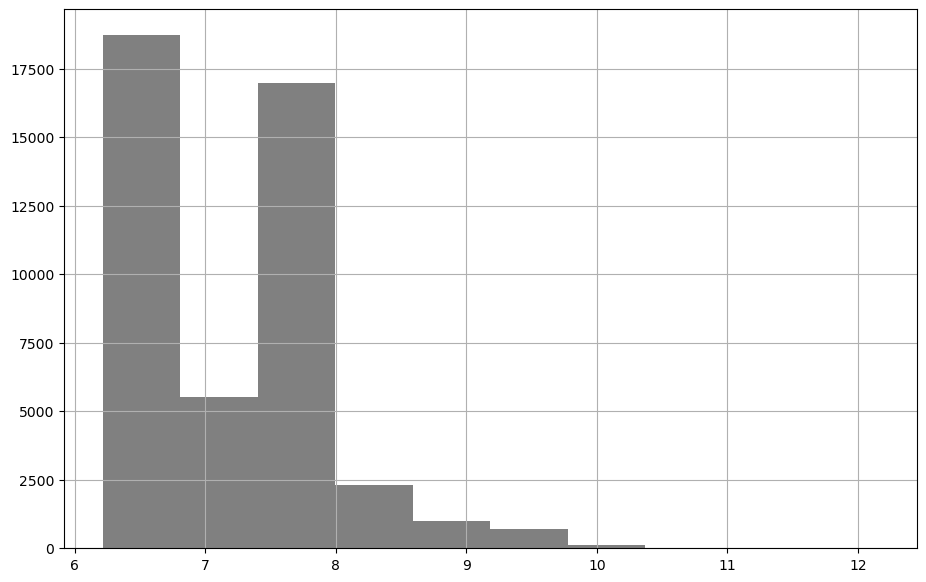

In [39]:
plt.figure(figsize=(11, 7))
plt.hist(np.log(data['gold_on_event']), color='gray')
plt.grid(True)
plt.show()

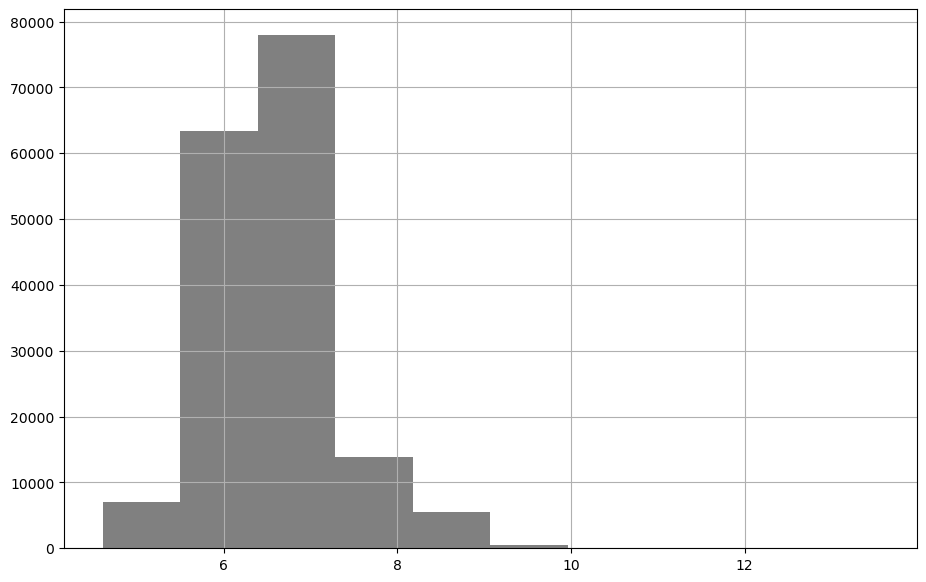

In [41]:
plt.figure(figsize=(11, 7))
plt.hist(np.log(data['gold_on_other_activities']), color='gray')
plt.grid(True)
plt.show()

In [42]:
data['gold_on_event_binary'] = (data['gold_on_event'] > 0)*1

In [44]:
data['gold_on_other_activities_binary'] = (data['gold_on_other_activities'] > 0)*1

In [45]:
data.head(10)

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_binary,gold_on_other_activities_binary
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0
5,Control,203a74059afce17b1ae5e19cab1147faf8d20010,2020-02-21,2019-01-22,ResourceSpend,itunes,Paid,France,361720,1193,30.0,0.0,0.0,NaN,NaN,0,0
6,Control,faba7453a9c06c9e1bd039057cf4b72a36ee55a8,2020-02-28,2019-09-09,ResourceSpend,itunes,Paid,Germany,744718,893,29.0,0.0,0.0,NaN,NaN,0,0
7,Test,a7e62ccfa04fd4a7efe873987fae2661b5c718ec,2020-02-11,2019-09-17,ResourceSpend,itunes,Paid,United Kingdom of Great Britain and Northern I...,1340154,934,32.0,0.0,0.0,NaN,1200.0,0,1
8,Control,d07eda72e9d914f6bfc9681ca86790374ebf224b,2020-02-11,2018-11-07,ResourceSpend,itunes,Paid,Canada,1192713,1299,50.0,0.0,0.0,NaN,NaN,0,0
9,Test,5244b5e9c2321e294bfffb3a07290a2437be19cc,2020-02-13,2019-04-23,ResourceSpend,itunes,Paid,Germany,136307,277,93.0,0.0,0.0,NaN,NaN,0,0


In [52]:
(data.groupby('AbGroup')
 [['gold_on_event_binary', 
   'gold_on_event', 
   'gold_on_other_activities_binary', 
   'gold_on_other_activities']].agg({'gold_on_event_binary': ['mean', 'count'],
                                    'gold_on_event': ['mean', 'count', 'median'],
                                    'gold_on_other_activities_binary': ['mean', 'count'],
                                    'gold_on_other_activities': ['mean', 'count', 'median']}))

gold_on_event_binary         gold_on_event                 \
                        mean   count          mean  count  median   
AbGroup                                                             
Control              0.06523  558070   1965.211658  36403  1000.0   
Test                 0.06492  138770   2104.606505   9009  1500.0   

        gold_on_other_activities_binary         gold_on_other_activities  \
                                   mean   count                     mean   
AbGroup                                                                    
Control                        0.241385  558070               911.892213   
Test                           0.241284  138770              1035.412000   

                        
          count median  
AbGroup                 
Control  134710  600.0  
Test      33483  600.0